# Reasons for using feature selection:
1. Improve data processing efficiency; reduce memory usage.
2. Reducing the number of features, to reduce overfitting and improve the generalization of models.
3. To gain a better understanding of the features and their relationship to the response variables.

# Feature selection overview

<hr/>

小鼠肾脏代谢组学.xlsx

WT-1 ~ 8 为control group, OIR-1 ~ 8为experiment group. Independent samples.

<hr/>


### 相关系数、info gain、etc


## 1. Load Data

C:\Users\eleve\AppData\Roaming\Python\Python313\site-packages\spa\io\__init__.py:321: SyntaxWarning: invalid escape sequence '\s'
  str(SD) + '\sigma$ (' + str(len(X)) + ' samples)')


load dataset from metabolomics.txt
X.shape (16, 5022)  y.shape (16,)


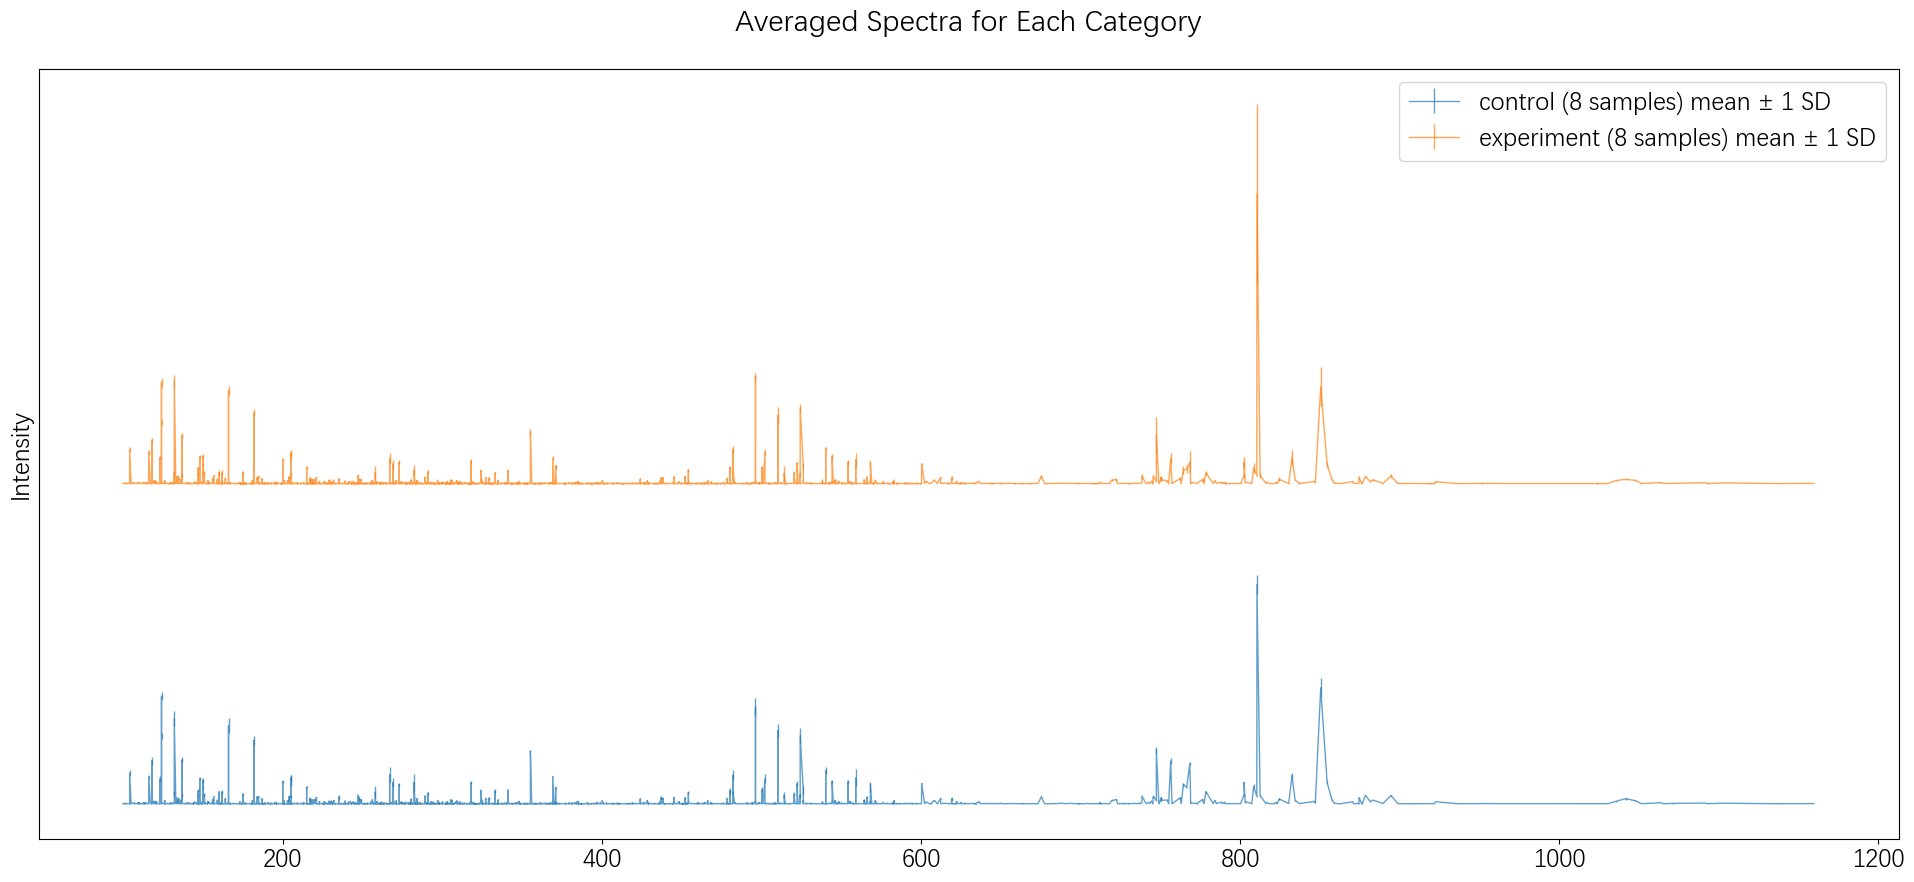

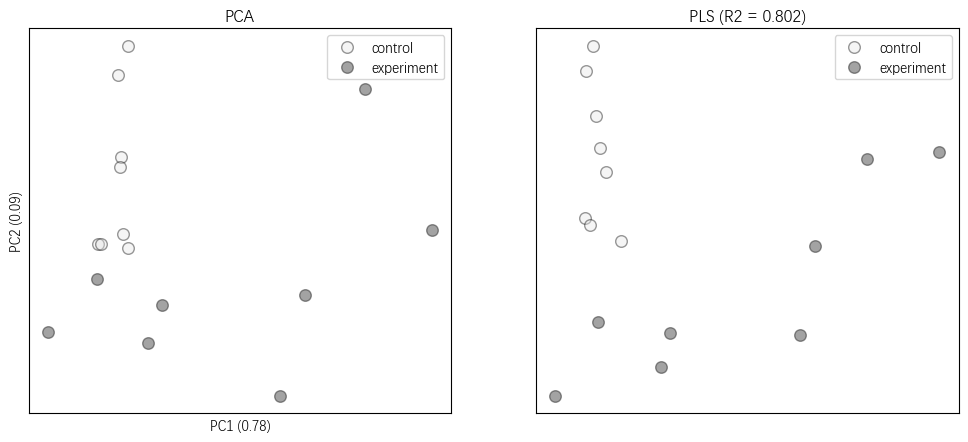

Mouse kidney-eye metabolomics dataset | 小鼠肾脏代谢组学

WT-1 ~ 8 为control group, OIR-1 ~ 8为experiment group. Independent samples.

-----------------------------------
If you use this dataset, reference these articles: 
[1] Comparative Analysis Reveals Novel Changes in Plasma Metabolites and Metabolomic Networks of Infants With Retinopathy of Prematurity [J]. IOVS, SCI, 2022, 63(28), doi: 110.1167/iovs.63.1.28. 
[2] Kidney-eye metabolomics in a mouse mode of oxygen-induced retinopathy correlates with those in retinopathy of prematurity, Nature Communications, 2023, (reference number: NCOMMS-23-00213, Under Review)


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spa import io

X, y, X_names, _, labels = io.load_dataset('mouse_omics', shift = 50000000, display=True)

## 2. Make a classifiability analysis with cla

cla.metrics.get_metrics(X,y)

<pre>
{'classification.ACC': 1.0,
  'classification.Kappa': 1.0,
  'classification.F1_Score': 1.0,
  'classification.Jaccard': 1.0,
  'classification.Precision': 1.0,
  'classification.Recall': 1.0,
  'classification.McNemar': 0.0,
  'classification.McNemar.CHI2': inf,
  'classification.CochranQ': nan,
  'classification.CochranQ.T': nan,
  'classification.CrossEntropy': 3.662372001306587e-08,
  'classification.Mean_KLD': 3.662371944795475e-08,
  'classification.AP': 1.0,
  'classification.Brier': 1.0543237481796955e-14,
  'classification.ROC_AUC': 1.0,
  'classification.PR_AUC': 1.0,
  'classification.BER': 0.0,
  'classification.SVM.Margin': 3981050.8772553094,
  'correlation.IG.max': 0.7253718503718508,
  'correlation.r.max': 0.9473902863233523,
  'correlation.r.p.min': 2.6012331790559098e-08,
  'correlation.rho.max': 0.8677218312746248,
  'correlation.rho.p.min': 1.329873727130143e-05,
  'correlation.tau.max': 0.7302967433402214,
  'correlation.tau.p.min': 0.0007775304469403846,
  'test.ES.max': 5.5373692024671515,
  'test.student.min': 1.9452418498747086e-06,
  'test.student.min.log10': -5.711026395604918,
  'test.student.T.max': 11.074738404934303,
  'test.ANOVA.min': 2.601233179055904e-08,
  'test.ANOVA.min.log10': -7.5848207151481475,
  'test.ANOVA.F.max': 122.64983073772686,
  'test.MANOVA': 0.002247,
  'test.MANOVA.log10': -2.648396927580871,
  'test.MANOVA.F': 10.109504,
  'test.MWW.min': 0.0001554001554001554,
  'test.MWW.min.log10': -3.8085485512404054,
  'test.MWW.U.min': 0.0,
  'test.KS.min': 0.00015540015540015537,
  'test.KS.min.log10': -3.8085485512404054,
  'test.KS.D.max': 1.0,
  'test.CHISQ.min': 0.03630882789048883,
  'test.CHISQ.min.log10': -1.4399877706109065,
  'test.CHISQ.CHI2.max': 4.382541124087026,
  'test.KW.min': 0.000777530446940383,
  'test.KW.min.log10': -3.109282595639645,
  'test.KW.H.max': 11.294117647058826,
  'test.Median.min': 0.5,
  'test.Median.min.log10': -0.3010299956639812,
  'test.Median.CH2.max': 0.454936423119572,
  'overlapping.F1.mean': 0.29540624419729367,
  'overlapping.F1.sd': 0.2013813320239405,
  'overlapping.F1v.mean': 0.7408278574273198,
  'overlapping.F1v.sd': 0.03313020408590226,
  'overlapping.F2.mean': 0.8125,
  'overlapping.F2.sd': 0.0,
  'overlapping.F3.mean': 0.0,
  'overlapping.F3.sd': 0.0,
  'overlapping.F4.mean': nan,
  'overlapping.F4.sd': 0.06040049228175071,
  'neighborhood.N1': 0.23393010070995013,
  'neighborhood.N2.mean': 0.2,
  'neighborhood.N2.sd': 0.4068381021724862,
  'neighborhood.N3.mean': 0.28626741800257505,
  'neighborhood.N3.sd': 0.06628412202991939,
  'neighborhood.N4.mean': 0.1875,
  'neighborhood.N4.sd': 0.4031128874149275,
  'neighborhood.T1.mean': 0.010357570026545602,
  'neighborhood.T1.sd': 0.04011469621998823,
  'neighborhood.LSC': 313.875,
  'linearity.L1.mean': 0.3125,
  'linearity.L1.sd': 0.0009956192751891676}
</pre>

## 根据 cla 分析结果，预计分类结果比较理想

## 3. Preview
### PCA降维（sklearn.decomposition.PCA）

No module named 'rpy2'


ValueError: perplexity must be less than n_samples

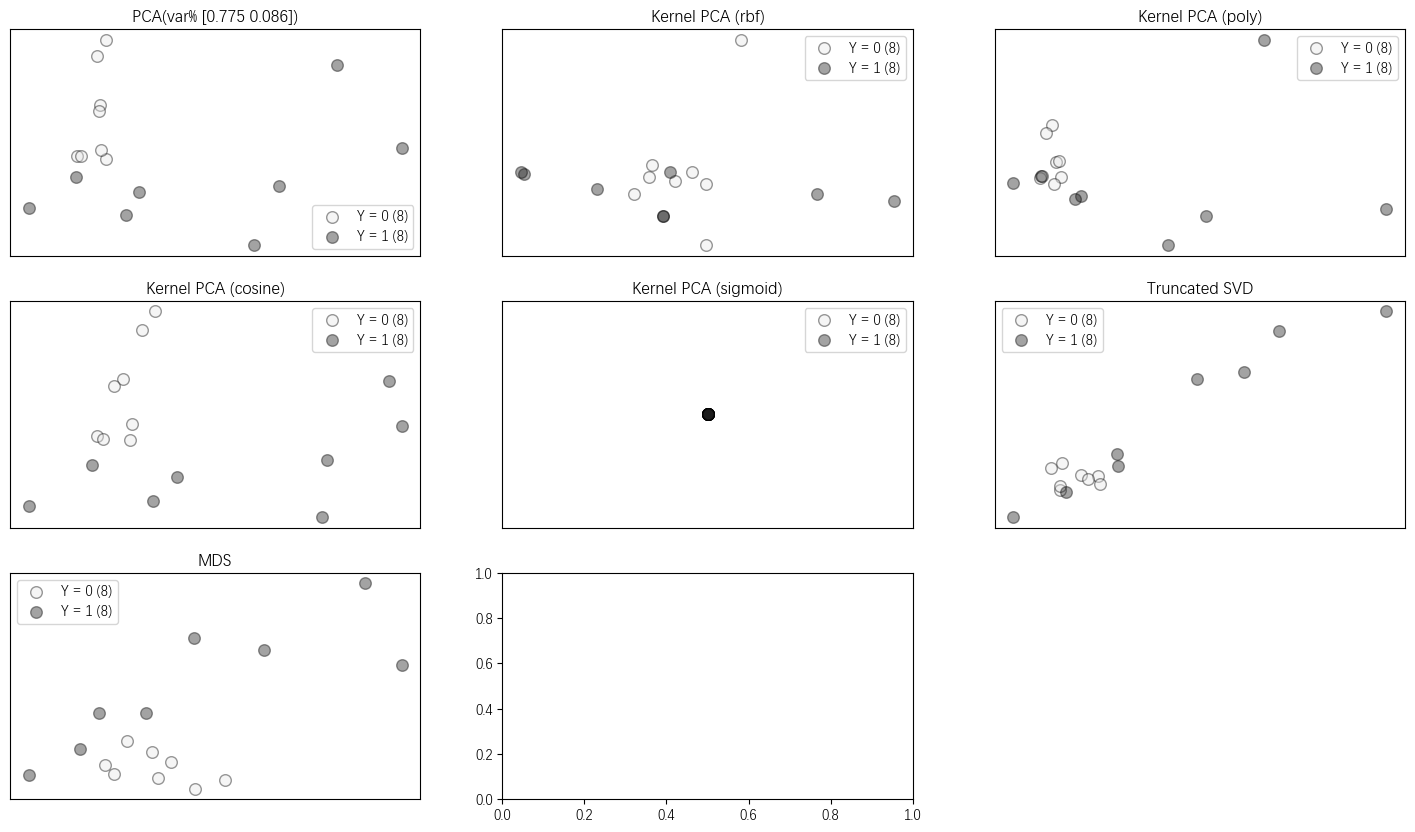

In [2]:
from cla import metrics
metrics.unsupervised_dimension_reductions(X, y)

直接用非监督降维查看数据的可分性如上. 下面进行feature selection，选取有利于分类的特征。

<hr/>

# Feature Selection

<Figure size 2000x2000 with 0 Axes>

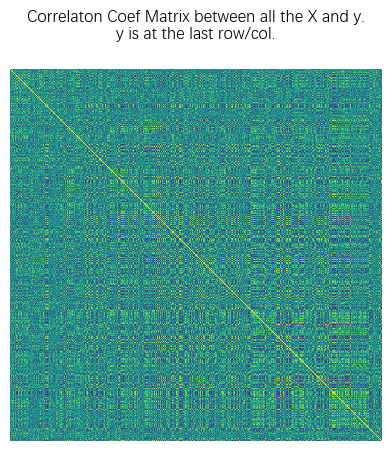

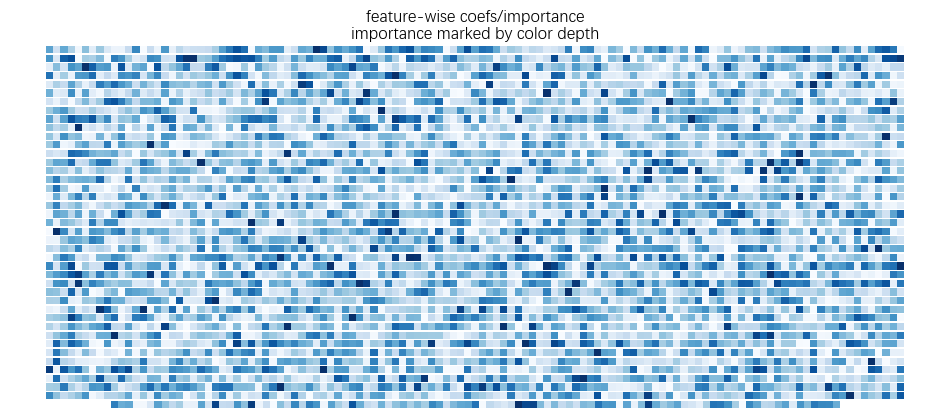

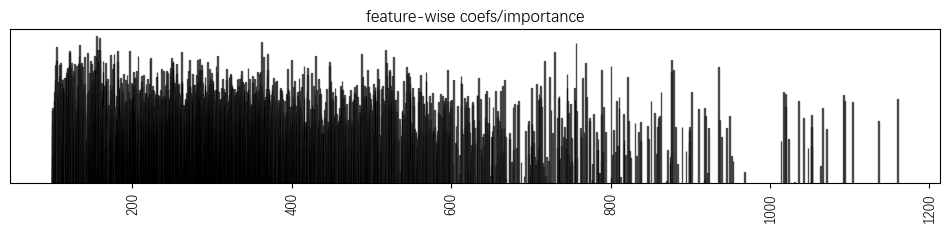

Important feature Number:  30
Important features indices:  [ 408  468 3432 4911  245   37 4434  459  426  886  669  140 1997 4883
  139  302  644 3503 4276  586  238 3969 1084  386 2705 3452  282  407
 4478 1334]
Important features names:  [155.034569  159.0662065 362.2700024 756.5508281 134.0458481 105.0700692
 517.3494697 159.0276168 156.0767318 196.016501  181.0140873 121.0651047
 261.1493053 729.5890667 121.0650956 144.080659  177.0404987 369.1498092
 487.1989478 172.0967808 133.1010636 429.2965528 207.0780788 152.0565387
 307.1220599 364.3412371 140.0464763 155.0255853 527.3041367 223.0728551]
Top-30 feature Importance:  [0.94739029 0.93587422 0.90749876 0.90385268 0.89310083 0.8759588
 0.85746906 0.85701622 0.85533418 0.85349397 0.85151067 0.85056171
 0.84639826 0.84611839 0.83928012 0.83730333 0.83238263 0.82996959
 0.82934025 0.82363768 0.82048911 0.81979575 0.81848152 0.8171575
 0.81621014 0.81501828 0.81201075 0.81134593 0.81001194 0.80670644]


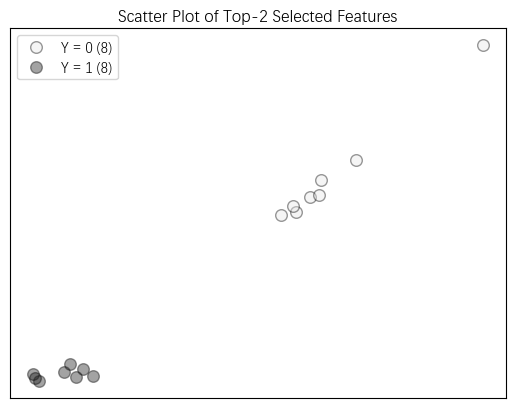

Exception in pearsion-r : perplexity must be less than n_samples


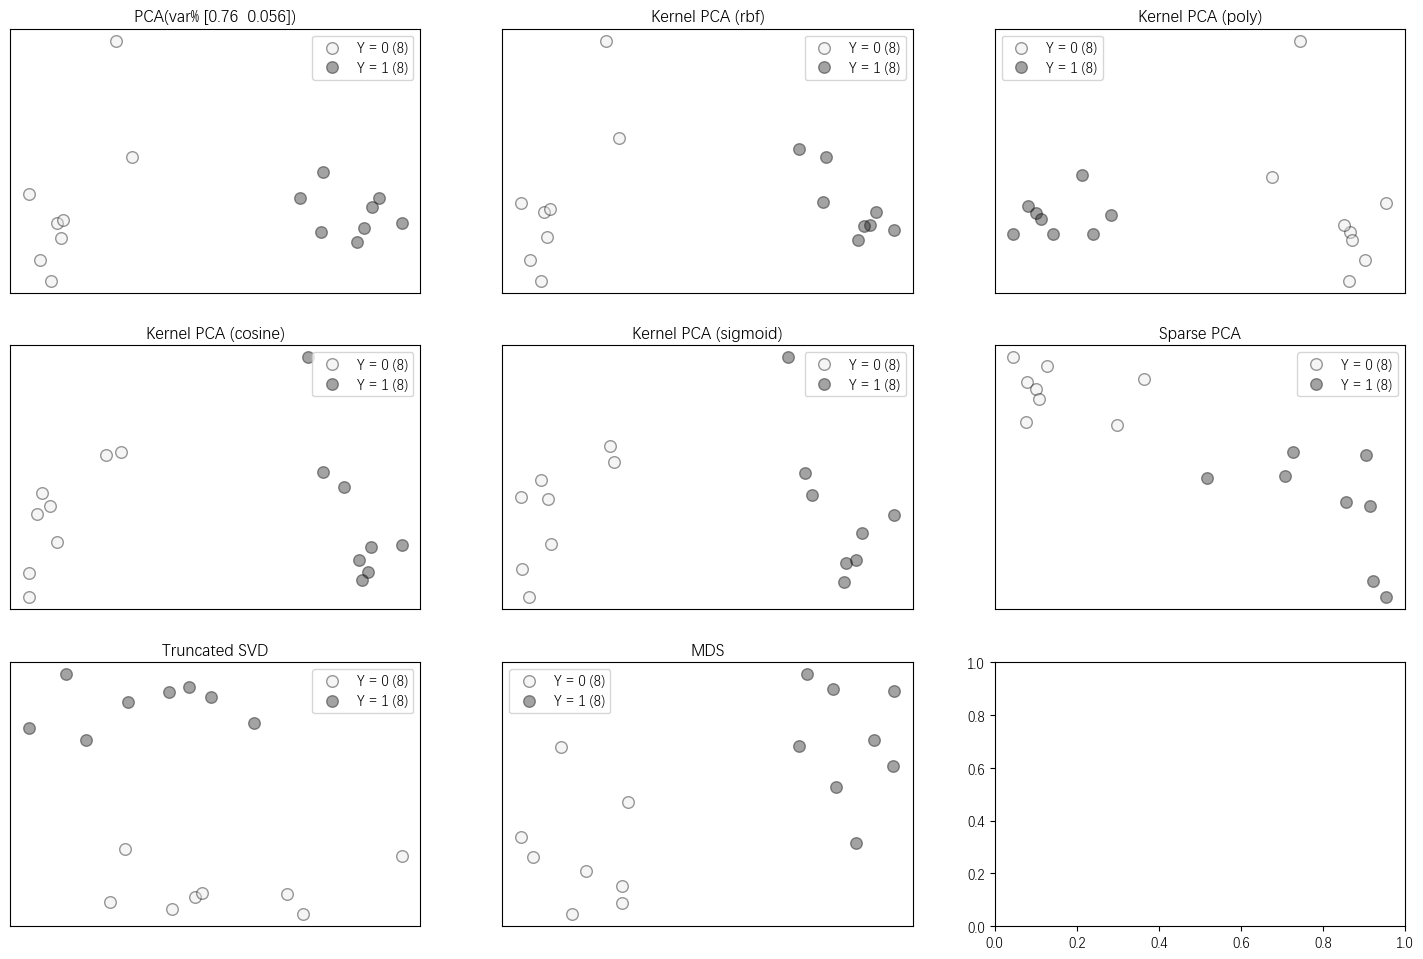

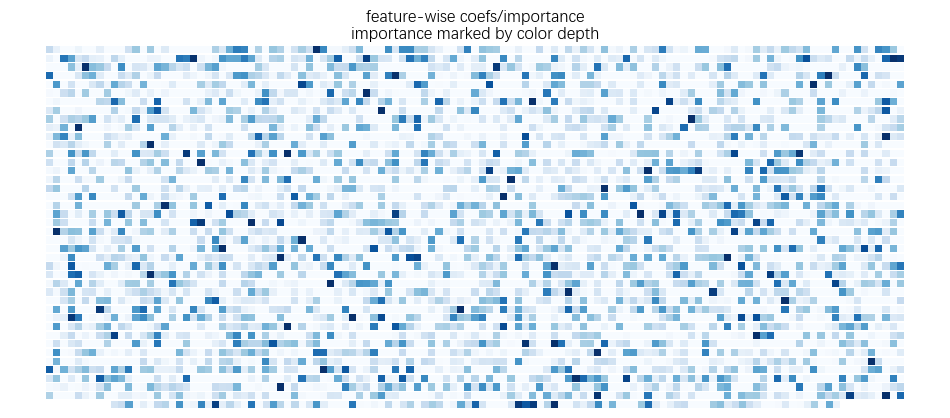

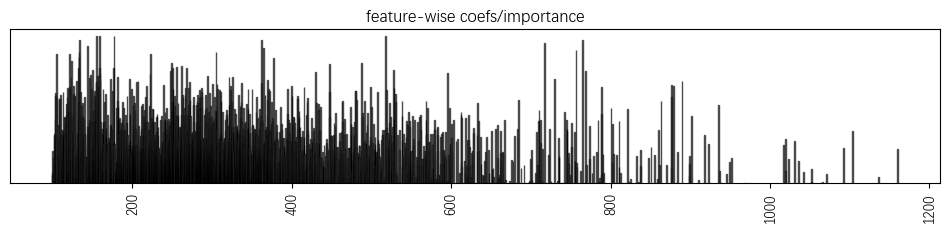

Important feature Number:  30
Important features indices:  [ 408  468  644 4434  245 4916 3432 4876  302 3452 4911 2675  237 1334
  140   37  239  238 3582  164 4276 1763 4058 1997 1864  225  639  473
 1770 2103]
Important features names:  [155.034569  159.0662065 177.0404987 517.3494697 134.0458481 764.5231232
 362.2700024 717.1490671 144.080659  364.3412371 756.5508281 305.0215323
 133.1009339 223.0728551 121.0651047 105.0700692 133.1047879 133.1010636
 377.1449129 124.0868878 487.1989478 249.1492027 447.3459424 261.1493053
 255.2311822 132.1018182 176.1178923 159.091527  250.1181895 268.1518826]
Top-30 feature Importance:  [0.72537185 0.72537185 0.72537185 0.72537185 0.70453852 0.70453852
 0.70453852 0.68891352 0.67641352 0.66808018 0.65706828 0.64925578
 0.64516352 0.63623495 0.63623495 0.63606133 0.62060995 0.62060995
 0.615228   0.60349685 0.59456828 0.59439467 0.58675578 0.57946411
 0.57356133 0.56644328 0.56644328 0.56592245 0.56592245 0.56592245]


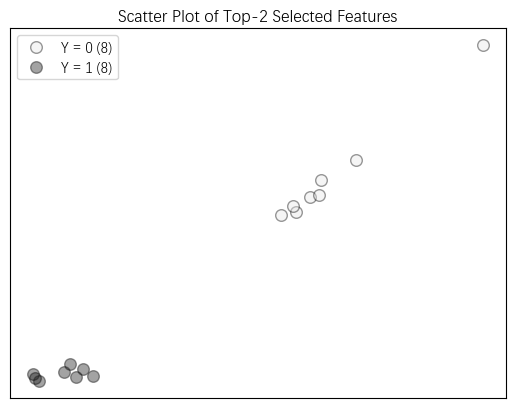

Exception in info-gain / mutual information : perplexity must be less than n_samples


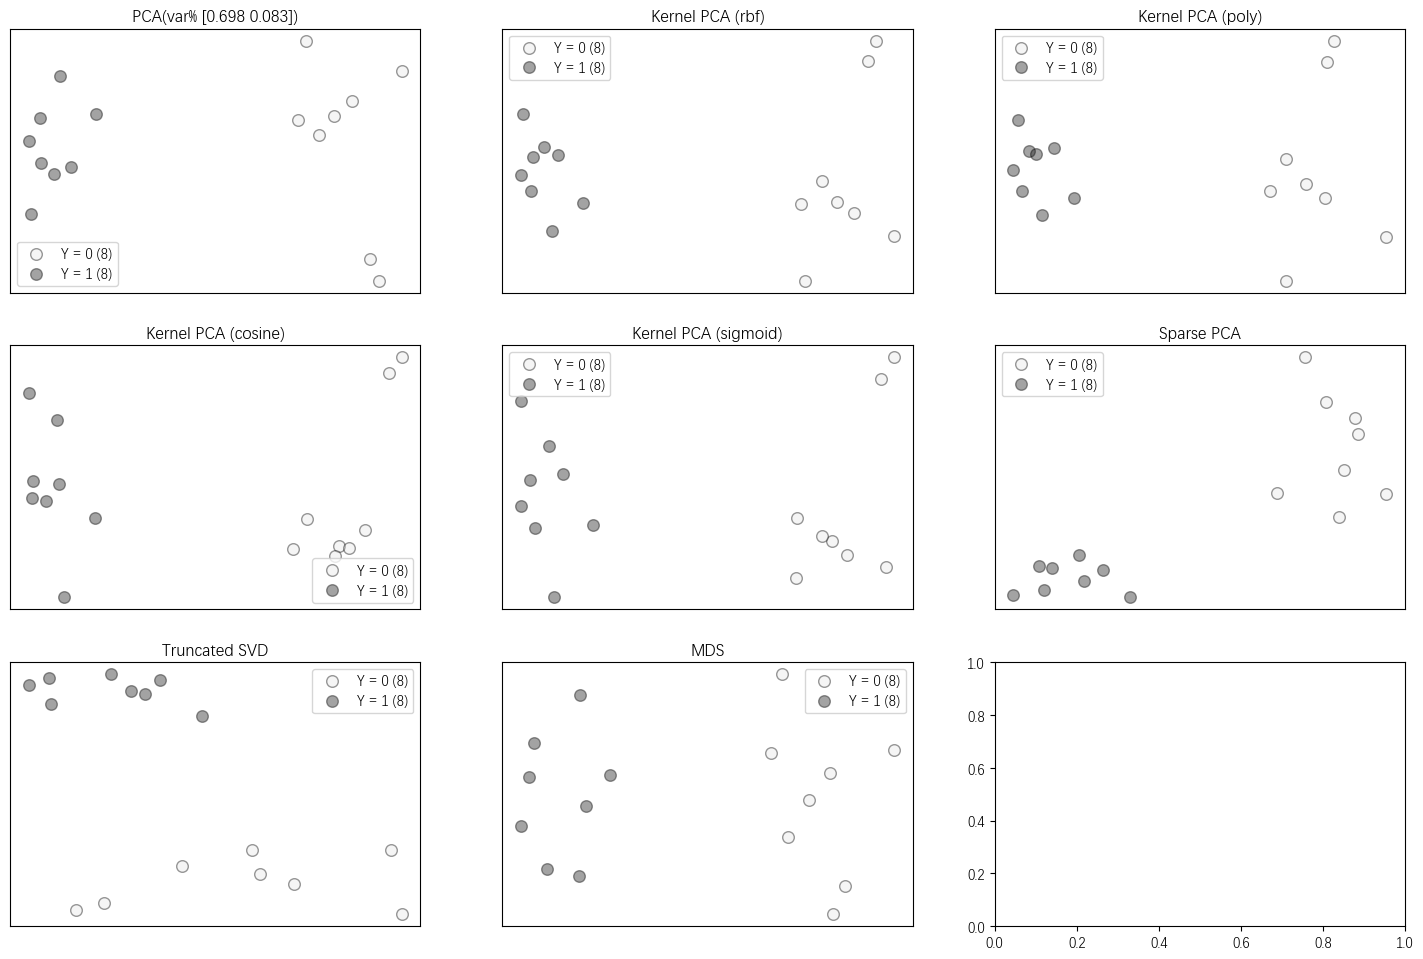

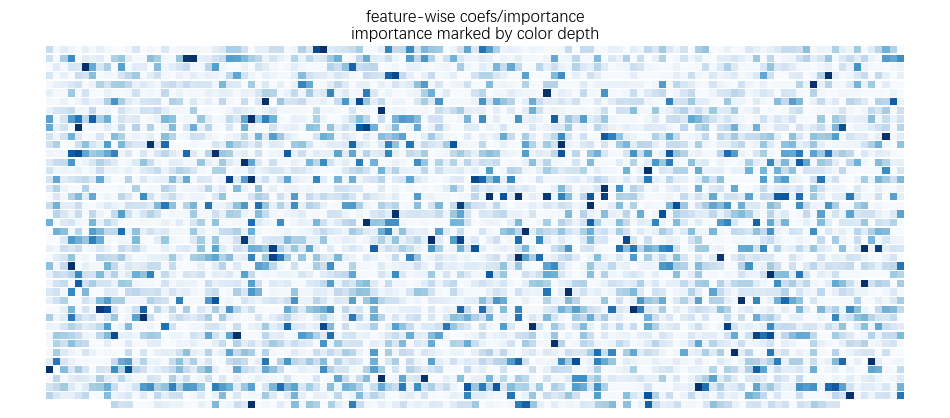

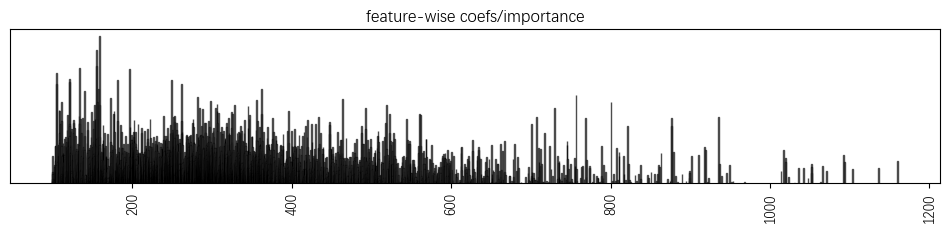

Important feature Number:  30
Important features indices:  [ 468  408  407  245  886   38  140 1763  669  139 1997   37 3432  431
  282 4911 2328  586 4150 3353 2586  426   60 4939 2693  386 4440 3003
  459 3220]
Important features names:  [159.0662065 155.034569  155.0255853 134.0458481 196.016501  105.0701518
 121.0651047 249.1492027 181.0140873 121.0650956 261.1493053 105.0700692
 362.2700024 157.0226167 140.0464763 756.5508281 282.0840971 172.0967808
 464.0759039 356.1326783 298.1062377 156.0767318 111.044205  800.5198148
 306.1195096 152.0565387 519.1062053 328.1013576 159.0276168 345.0798124]
Top-30 feature Importance:  [4.38254112 3.95816283 3.48227071 3.42887804 3.40606998 3.26942337
 3.11345615 3.07822911 3.05681359 3.02590915 2.96064513 2.9498349
 2.8041542  2.79085743 2.73969629 2.63293886 2.55840048 2.53883228
 2.5015516  2.47126538 2.43034889 2.42686171 2.4217823  2.41729243
 2.34398231 2.33677065 2.33180459 2.33088985 2.3209658  2.28212166]


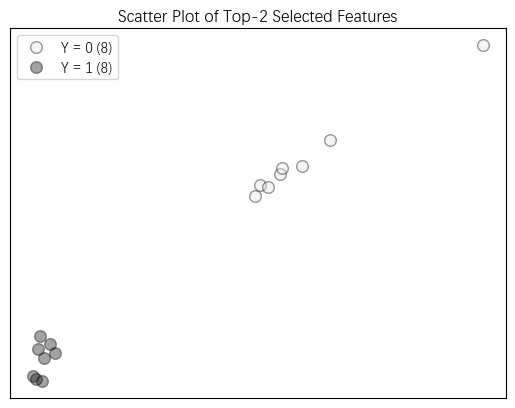

Exception in chi-squared statistic : perplexity must be less than n_samples


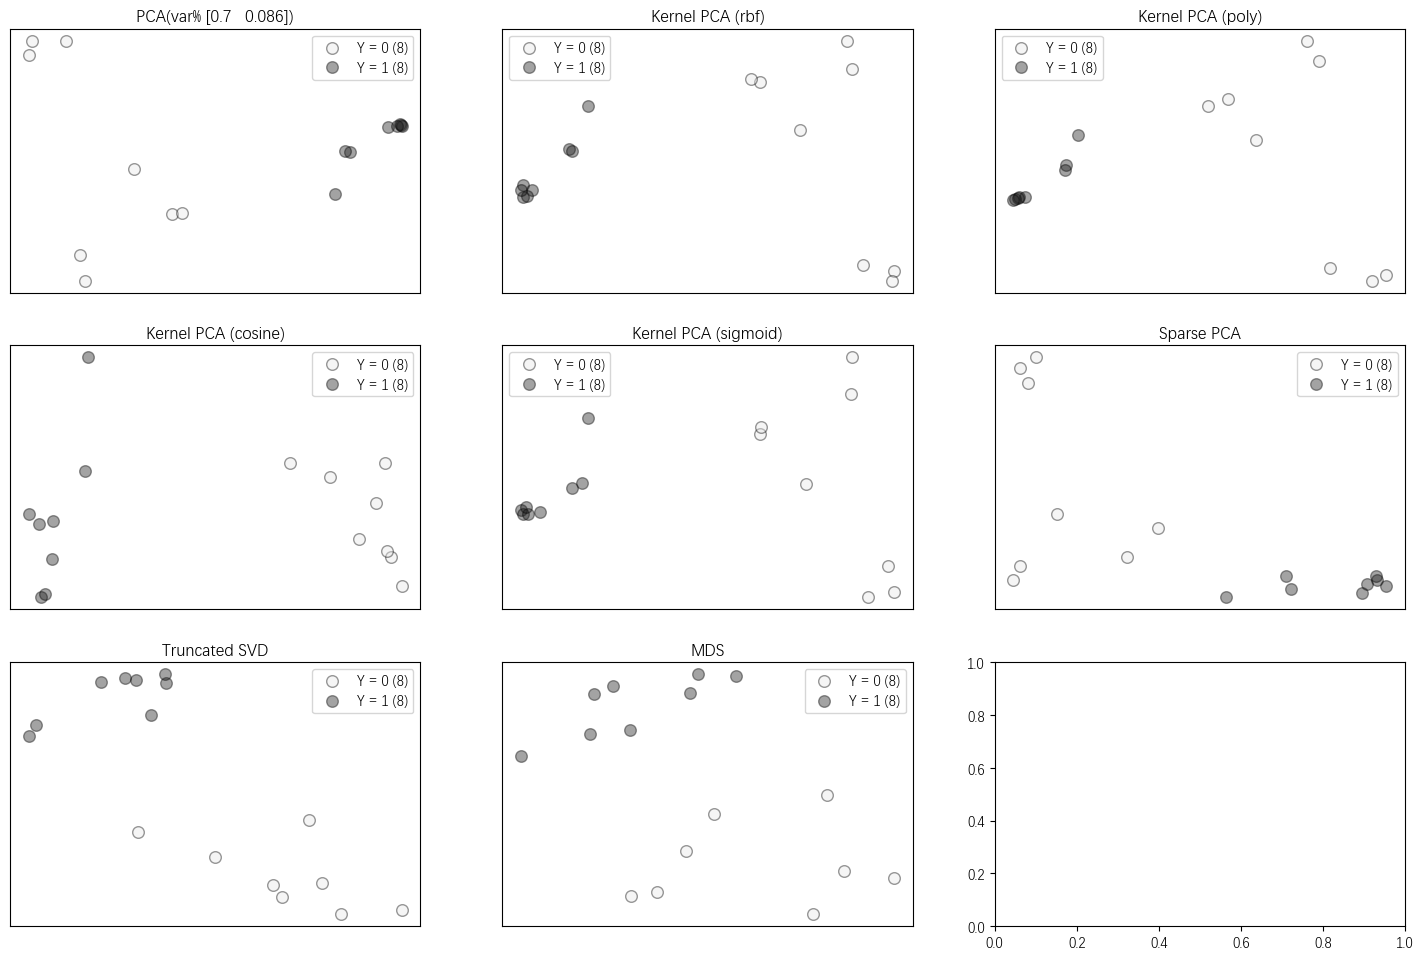

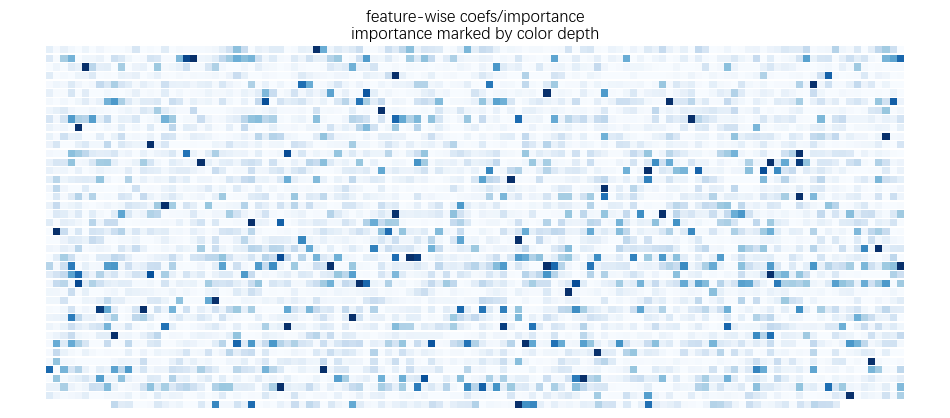

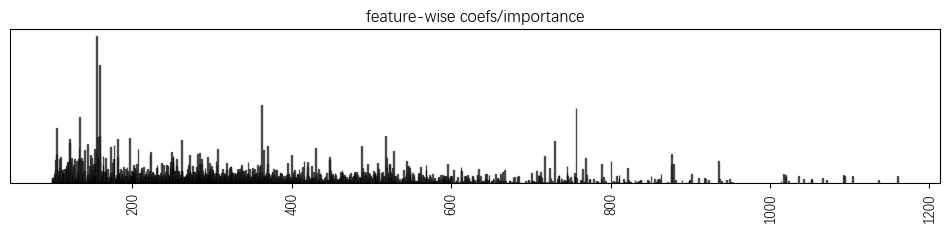

Important feature Number:  30
Important features indices:  [ 408  468 3432 4911  245   37 4434  459  426  886  669  140 1997 4883
  139  302  644 3503 4276  586  238 3969 1084  386 2705 3452  282  407
 4478 1334]
Important features names:  [155.034569  159.0662065 362.2700024 756.5508281 134.0458481 105.0700692
 517.3494697 159.0276168 156.0767318 196.016501  181.0140873 121.0651047
 261.1493053 729.5890667 121.0650956 144.080659  177.0404987 369.1498092
 487.1989478 172.0967808 133.1010636 429.2965528 207.0780788 152.0565387
 307.1220599 364.3412371 140.0464763 155.0255853 527.3041367 223.0728551]
Top-30 feature Importance:  [122.64983074  98.77641062  65.34439001  62.48169429  55.17990667
  46.16428701  38.88071223  38.72609131  38.16028534  37.55625285
  36.92213016  36.62471157  35.36356432  35.28125449  33.35987618
  32.83478208  31.58194405  30.9943056   30.8438028   29.52949864
  28.83996905  28.69139691  28.412932    28.13648681  27.94115528
  27.69828756  27.09928368  26.96948

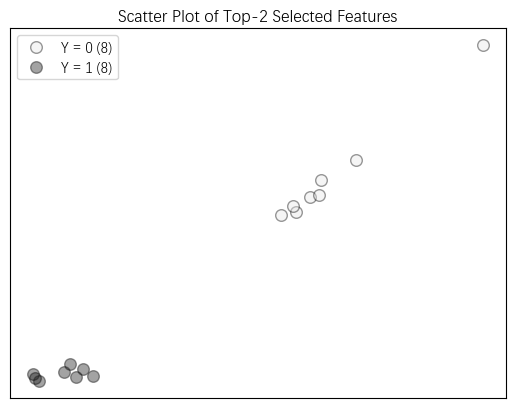

Exception in anova statistic : perplexity must be less than n_samples


R2 =  1.0
LASSO alpha = 0.000156
Non-zero feature coefficients: 35


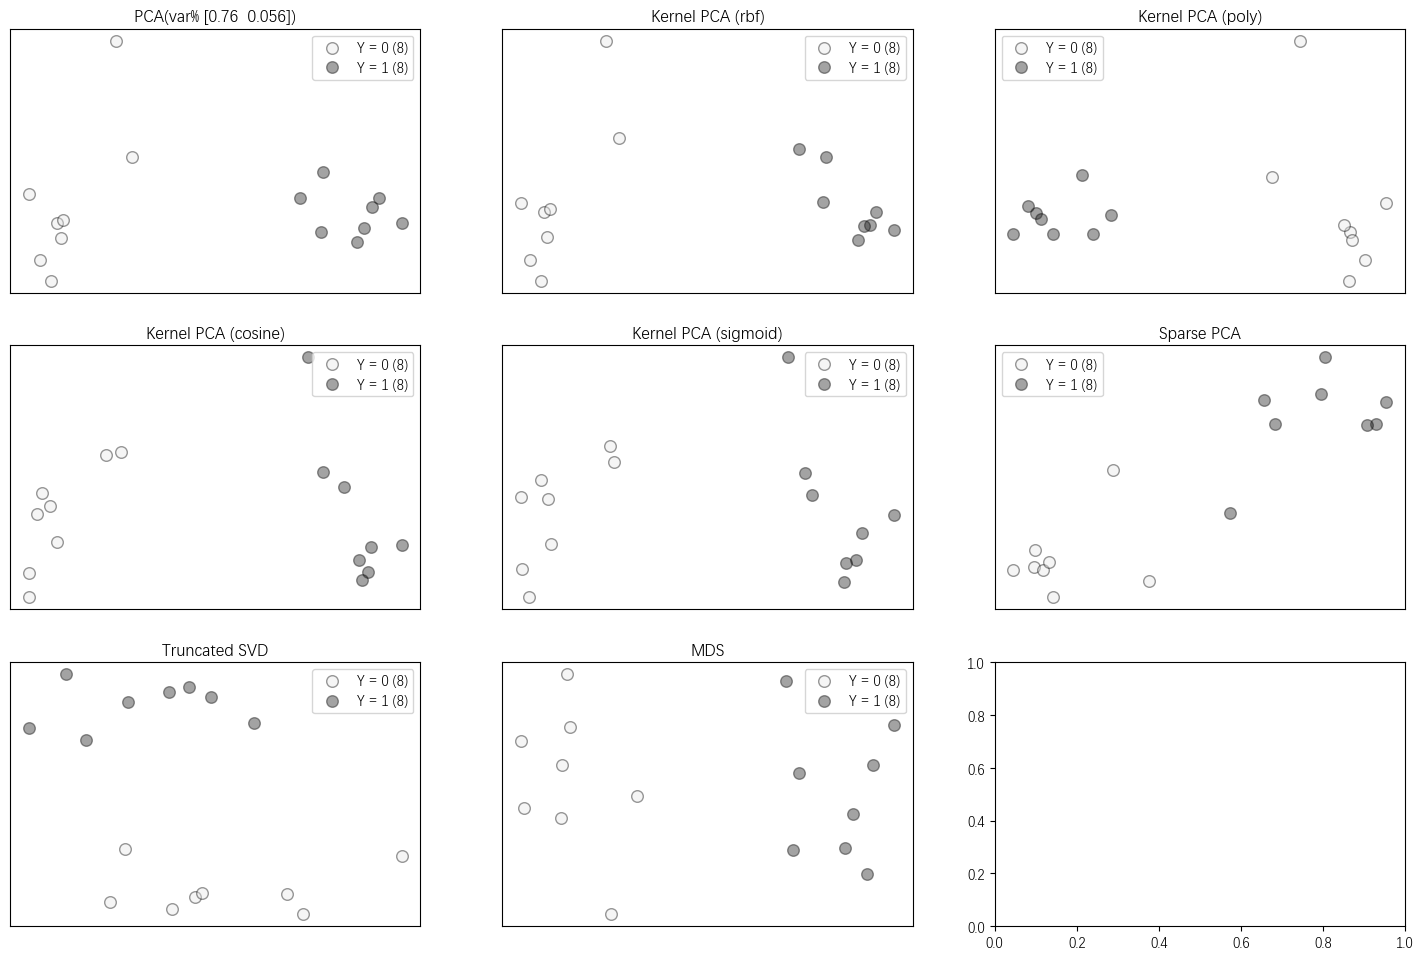

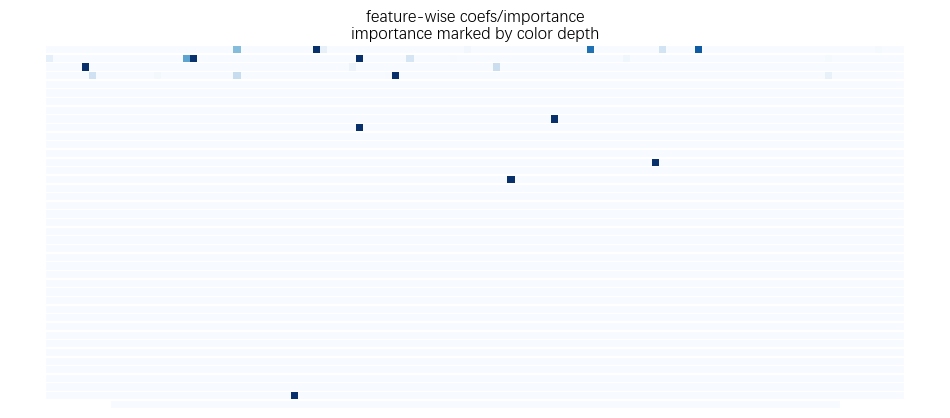

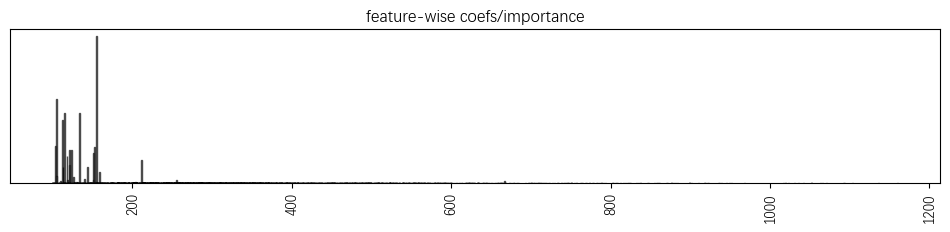

Important feature Number:  30
Important features indices:  [ 408   37   90  245   75   26  386  163  140  366  119 1123  139  302
   85  468   38  170  282 1864  120  375   58 4834  115  200  407 1030
  228 1644]
Important features names:  [155.034569  105.0700692 114.9610969 134.0458481 112.0872262 104.0531199
 152.0565387 124.0867892 121.0651047 151.038736  118.0862719 211.1185484
 121.0650956 144.080659  113.0962558 159.0662065 105.0701518 126.001663
 140.0464763 255.2311822 119.0161068 151.0752537 110.0715449 667.2601965
 118.0652505 130.0651347 155.0255853 204.0869203 133.0646743 243.0737902]
Top-30 feature Importance:  [0.4004424  0.22868213 0.19043821 0.18980327 0.17188936 0.09982178
 0.09658474 0.08998674 0.08867256 0.08021196 0.07402656 0.06193178
 0.04852698 0.04229826 0.04213835 0.028327   0.01839451 0.01539242
 0.01059092 0.00877846 0.00819839 0.00708072 0.00598895 0.00421982
 0.0033909  0.00316838 0.00190113 0.00182774 0.00112534 0.00070404]


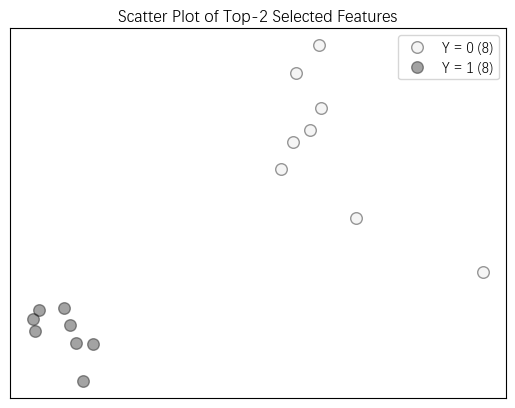

Exception in lasso : perplexity must be less than n_samples


R2 =  1.0
alpha =  0.000313 , L1 ratio =  0.5
Non-zero feature coefficients: 44


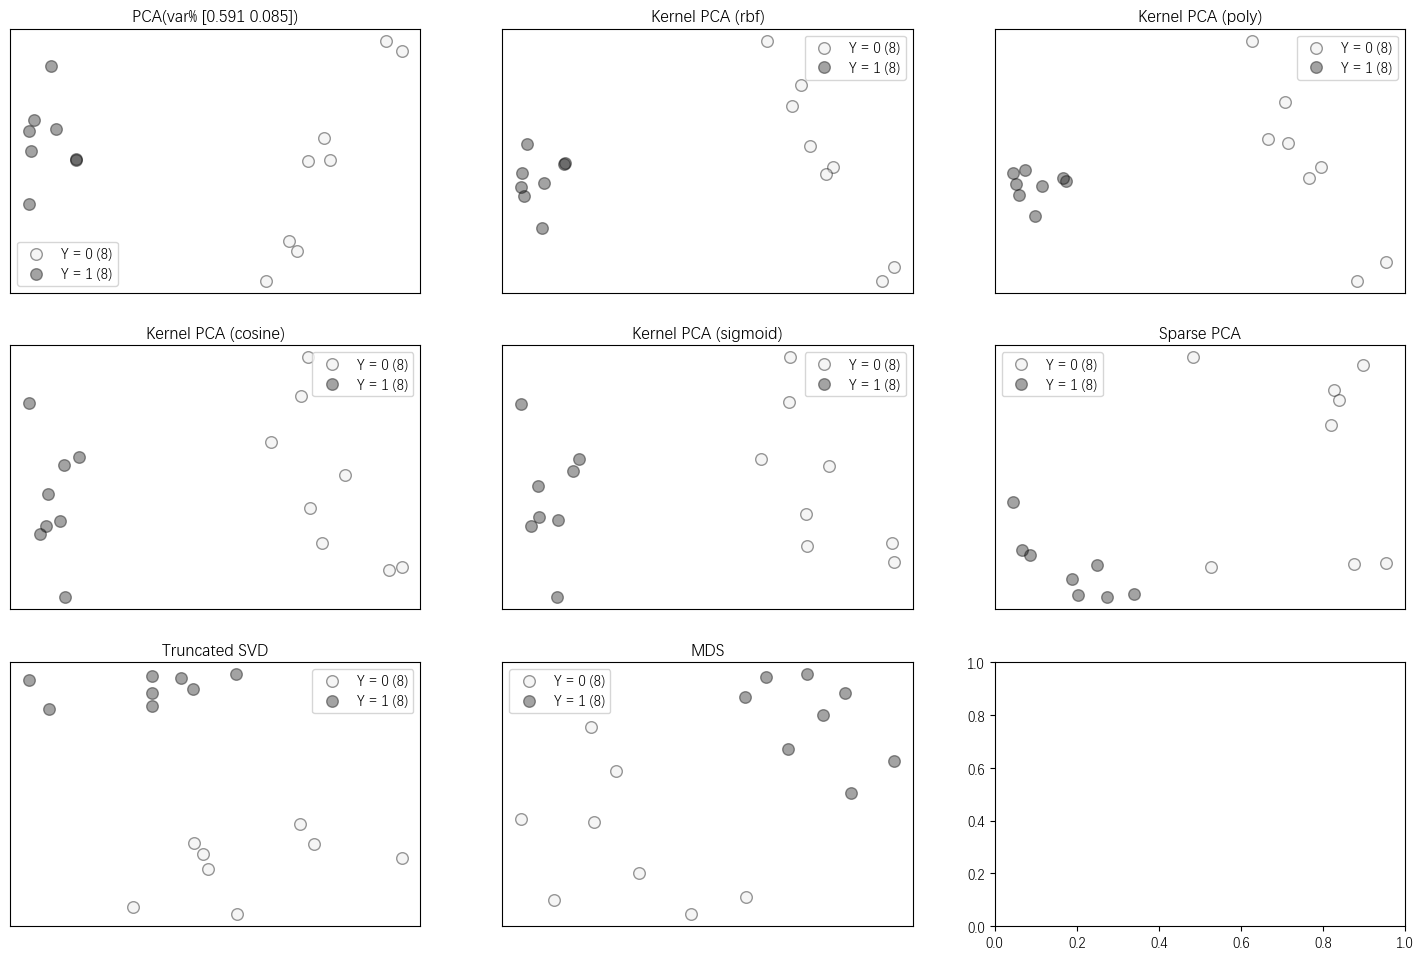

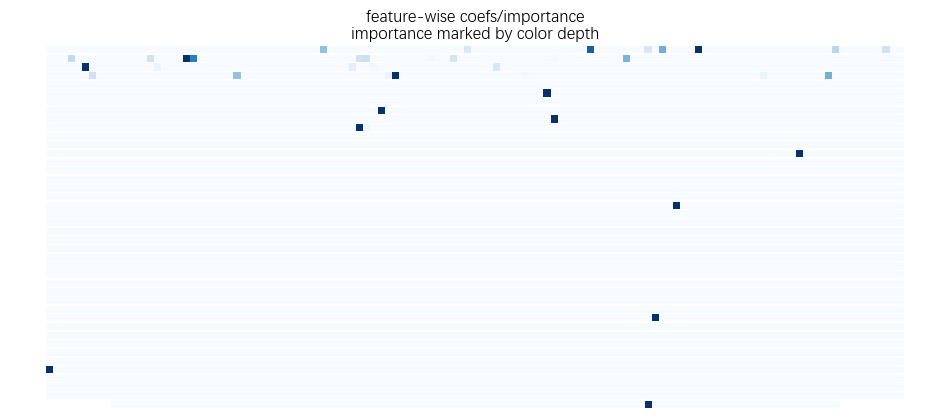

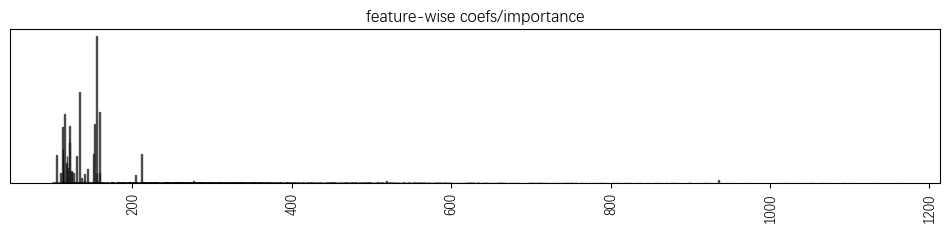

Important feature Number:  30
Important features indices:  [ 408  245  468   90  386  139   75  140   85  366 1123   38  119  200
  109  123  302  116  164  163  134   83   58  176  459  282  407 1030
  255 4994]
Important features names:  [155.034569  134.0458481 159.0662065 114.9610969 152.0565387 121.0650956
 112.0872262 121.0651047 113.0962558 151.038736  211.1185484 105.0701518
 118.0862719 130.0651347 117.0659532 119.0857125 144.080659  118.0652669
 124.0868878 124.0867892 120.1019233 113.071101  110.0715449 126.1027436
 159.0276168 140.0464763 155.0255853 204.0869203 136.0515503 935.1271652]
Top-30 feature Importance:  [0.31349855 0.19356819 0.15157133 0.14733668 0.12513544 0.12121281
 0.12010007 0.08493995 0.07296644 0.06181389 0.06142686 0.06036672
 0.05682584 0.05666894 0.04139437 0.0306478  0.02986905 0.02925991
 0.02573174 0.02308152 0.02279786 0.02225947 0.02148306 0.02027175
 0.02015032 0.01906045 0.01781298 0.01584388 0.01119631 0.00656665]


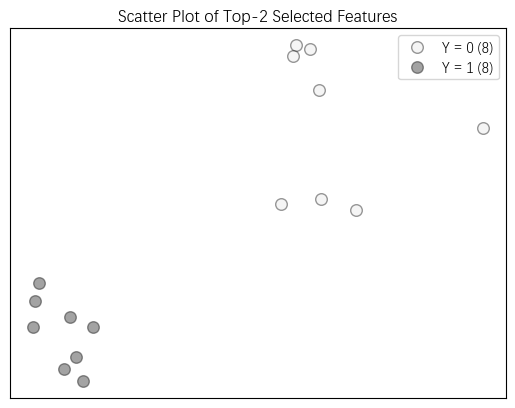

Exception in elastic net : perplexity must be less than n_samples


alpha =  0.1
R2 =  -3.0
Non-zero feature coefficients (eps =  0): 2451


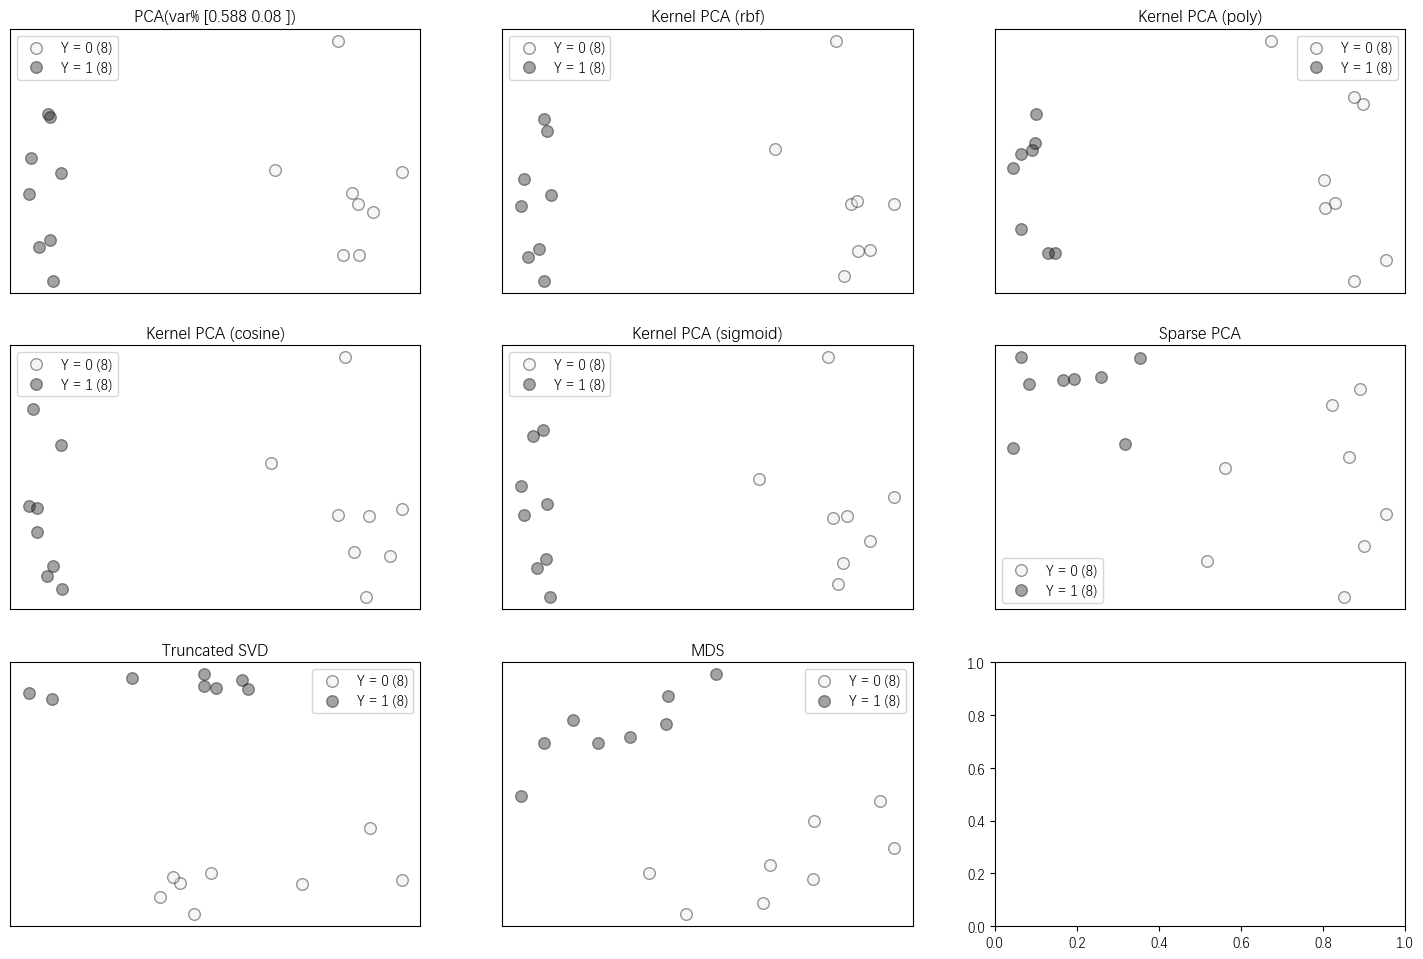

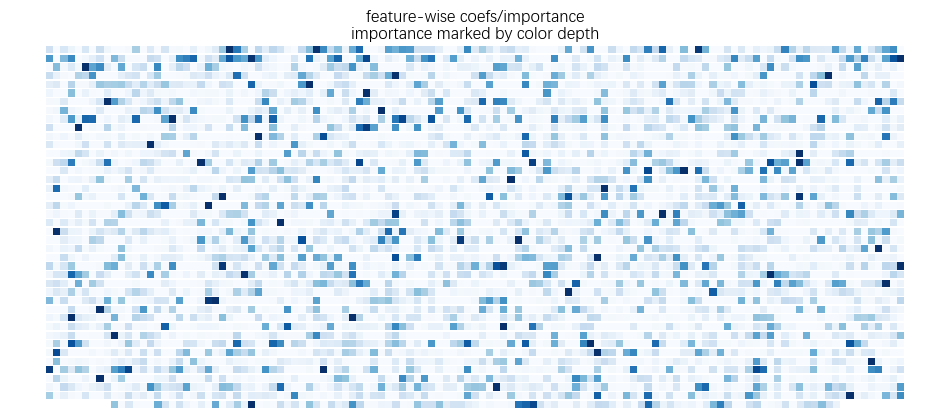

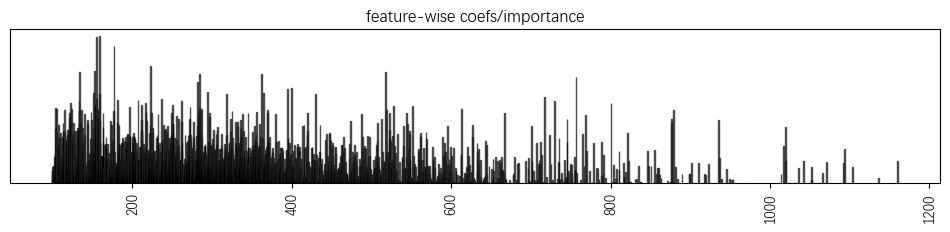

Important feature Number:  30
Important features indices:  [ 468  408  644 1334  386  245 4434 3432 2365 4911 2328 3762 3723 2521
  366 3452  459 2875 3969 4876  420 1544 1084  669 1997  238 4883  148
 4939 1229]
Important features names:  [159.0662065 155.034569  177.0404987 223.0728551 152.0565387 134.0458481
 517.3494697 362.2700024 284.0984909 756.5508281 282.0840971 399.2503038
 394.9947416 294.0844722 151.038736  364.3412371 159.0276168 318.0607302
 429.2965528 717.1490671 155.142749  236.1617573 207.0780788 181.0140873
 261.1493053 133.1010636 729.5890667 122.0270712 800.5198148 216.1346604]
Top-30 feature Importance:  [2.38936149e-14 2.36931037e-14 2.22892269e-14 1.89731305e-14
 1.82310009e-14 1.81214646e-14 1.80939061e-14 1.77777185e-14
 1.77199130e-14 1.71780373e-14 1.64723018e-14 1.54180714e-14
 1.53274439e-14 1.47222368e-14 1.45763927e-14 1.45568889e-14
 1.44585409e-14 1.44473970e-14 1.43986371e-14 1.38994829e-14
 1.36956449e-14 1.35863329e-14 1.34407159e-14 1.34270881e-14


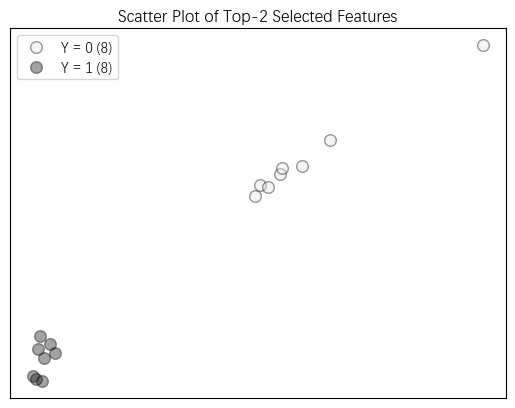

Exception in adaptive lasso : perplexity must be less than n_samples


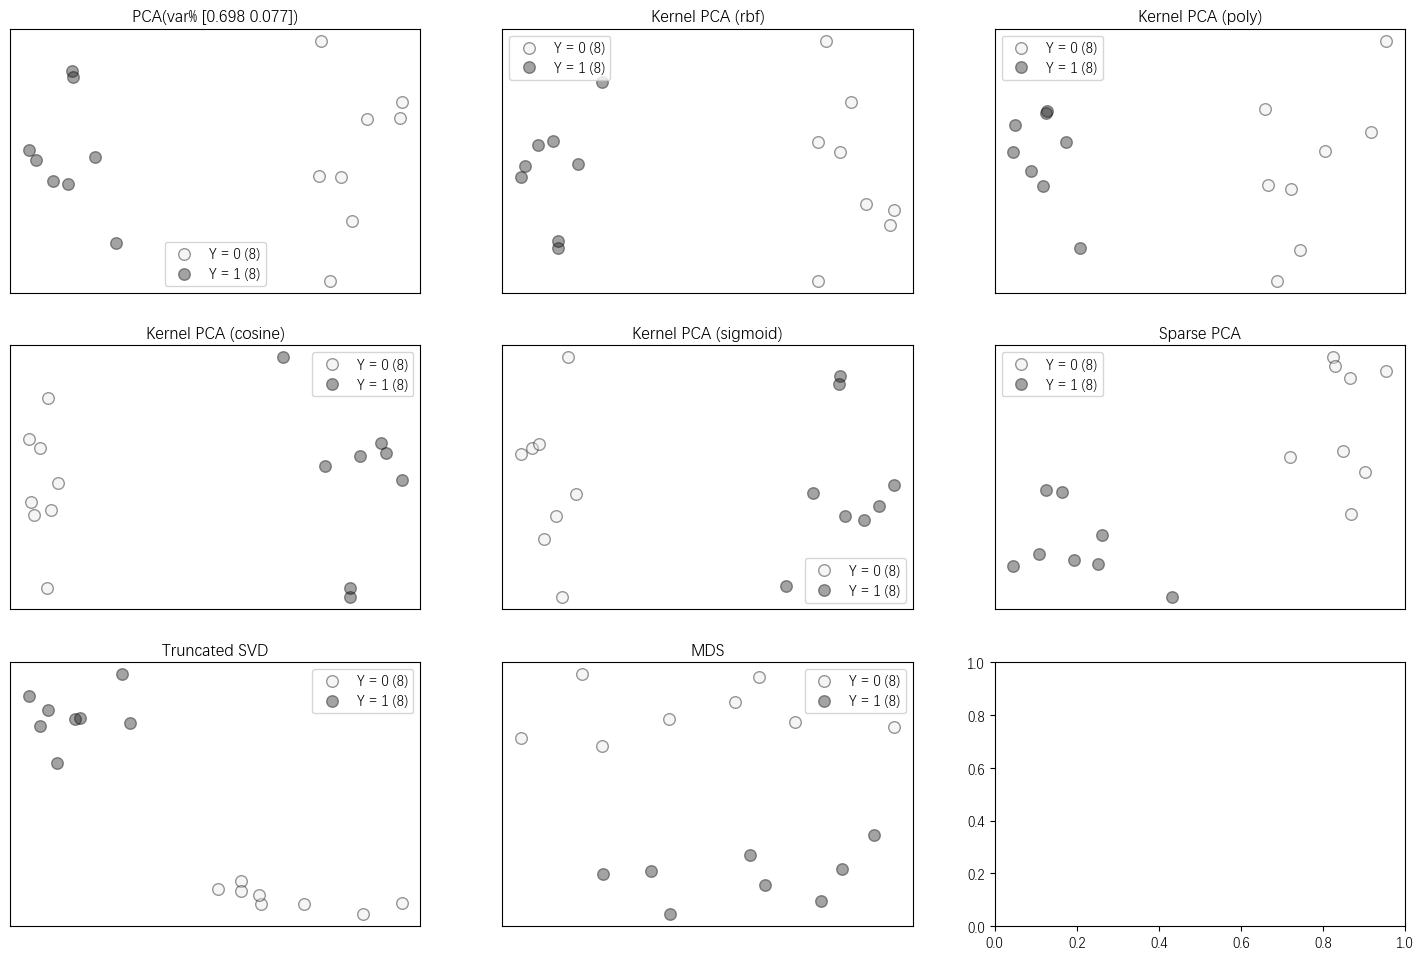

In [3]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_mm_scaled = mm_scaler.fit_transform(X)

from spa import fs
Xs, FS_IDX, FS_COMMON_IDX = fs.RUN_ALL_FS(X_mm_scaled, y, X_names, N = 30,output='all')

In [4]:
print(FS_IDX)

{}


In [5]:
np.array(X_names)[FS_COMMON_IDX]

array([], dtype=float64)

In [6]:
data_fs = pd.DataFrame(X[:,FS_COMMON_IDX])
data_fs['y'] = y
data_fs

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [7]:
from scipy.stats import pearsonr,spearmanr
from sklearn.feature_selection import mutual_info_classif
x=data_fs.iloc[:,:-1]
y=data_fs.iloc[:,-1]
info_gain=mutual_info_classif(x,y)
pc=[]
sp=[]
for i in range(4):
    x=data_fs.iloc[:,i]
    p = pearsonr(x,y)
    s = spearmanr(x,y)
    pc.append(p)
    sp.append(s)
pc,sp
pc=pd.DataFrame(pc)
sp=pd.DataFrame(sp)
print('pearsonr:',pc)
print('spearmanr:',sp)
print(info_gain)

ValueError: at least one array or dtype is required